In [2]:
import os
import tweepy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

API_KEY = os.environ.get('TWITTER_API_KEY')

API_SECRET_KEY = os.environ.get('TWITTER_API_SECRET_KEY')

BEARER_TOKEN = os.environ.get('TWITTER_API_OAUTH_BEARER_TOKEN')

ACCESS_TOKEN = os.environ.get('TWITTER_API_OAUTH_ACCESS_TOKEN')

ACCESS_SECRET_TOKEN = os.environ.get('TWITTER_API_OAUTH_ACCESS_SECRET_TOKEN')

auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET_TOKEN)

api = tweepy.API(auth)

user = api.me()

print(user.name)

Martin Njenga


In [3]:
tweets = []

for page in range(1, 5):
    tweets.extend(api.user_timeline(
        screen_name='@WilliamsRuto', count=100, page=page))
print("number of tweets extracted will be {}".format(len(tweets)))

number of tweets extracted will be 400


In [4]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted ==
              False and 'RT @' not in tweet.text]
for tweet in own_tweets[:5]:
    print(tweet.text)

The inclusion of COVID19 TREATMENT in the enhanced NHIF cover for PUBLIC SERVANTS is a welcome development. With th… https://t.co/coXZvubQtf
I pray that God grants their families, their loved ones and friends comfort during this painful moment.
It is quite unfortunate that we lost fishermen in a boat accident in Lake Victoria today. My deepest sympathies to… https://t.co/tKh57OUM5m
I LOVE this country enough NEVER to be part of any 'war.'Not when there is a real possibility for a WIN-WIN CONSENS… https://t.co/VxYTJ6eIET
We commend TSC for including COVID 19 insurance cover for its members. NHIF should emulate TSC by extending a simil… https://t.co/gQFHvINgu1


In [5]:
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                  columns=['Date', 'Tweets', 'Length of text', 'id', 'Likes', 'Retweets'])
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets
0,2020-11-18 14:23:41,The inclusion of COVID19 TREATMENT in the enha...,140,1329067758441512961,16,123
1,2020-11-18 14:22:58,"I pray that God grants their families, their l...",103,1329067578103304192,401,31
2,2020-11-18 14:22:57,It is quite unfortunate that we lost fishermen...,139,1329067576010293249,1305,97
3,2020-11-18 10:00:28,I LOVE this country enough NEVER to be part of...,140,1329001520789065728,3553,412
4,2020-11-17 11:48:24,We commend TSC for including COVID 19 insuranc...,140,1328666294657409024,2632,281


In [6]:
df[df['Likes'] == df['Likes'].max()]['Tweets']

105    Happy birthday to my friend and boss HE. Uhuru...
Name: Tweets, dtype: object

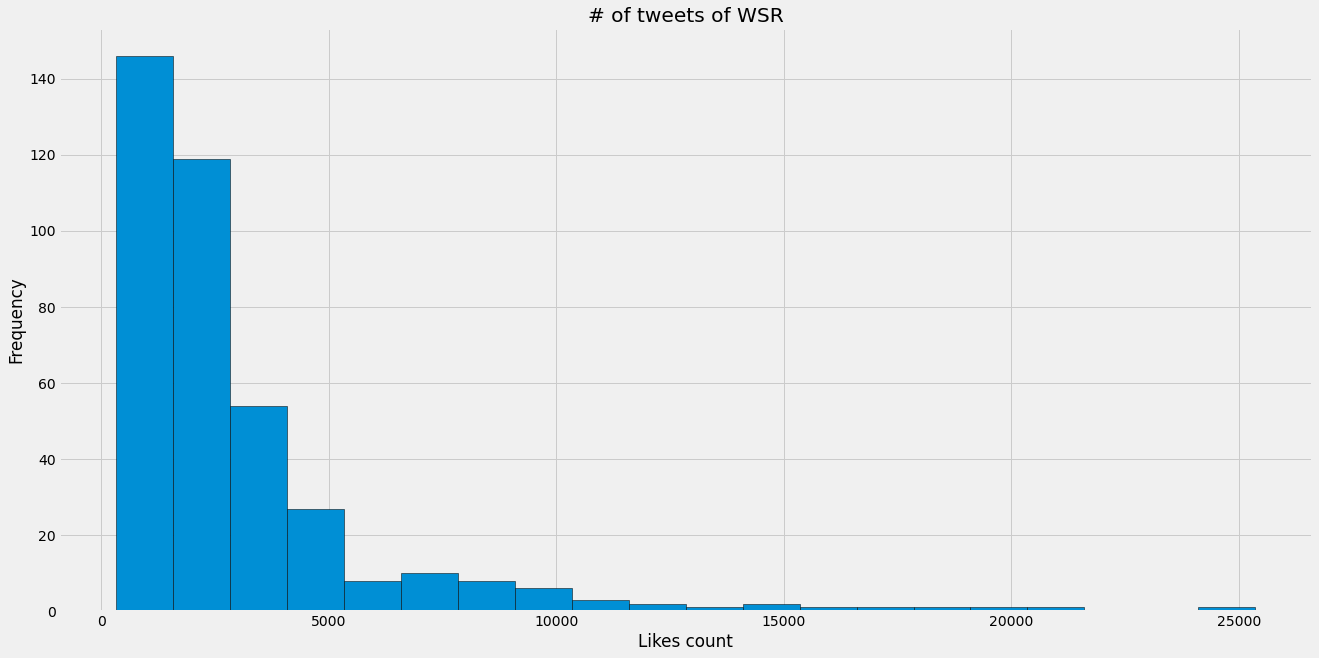

In [12]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes count')
plt.ylabel('Frequency')
plt.title('# of tweets of WSR')
plt.show()

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/martin-
[nltk_data]     kinaro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
vader = SentimentIntensityAnalyzer()

f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweets'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets,Sentiment
0,2020-11-18,The inclusion of COVID19 TREATMENT in the enha...,140,1329067758441512961,16,123,0.4588
1,2020-11-18,"I pray that God grants their families, their l...",103,1329067578103304192,401,31,0.8979
2,2020-11-18,It is quite unfortunate that we lost fishermen...,139,1329067576010293249,1305,97,-0.8268
3,2020-11-18,I LOVE this country enough NEVER to be part of...,140,1329001520789065728,3553,412,0.7125
4,2020-11-17,We commend TSC for including COVID 19 insuranc...,140,1328666294657409024,2632,281,0.4404


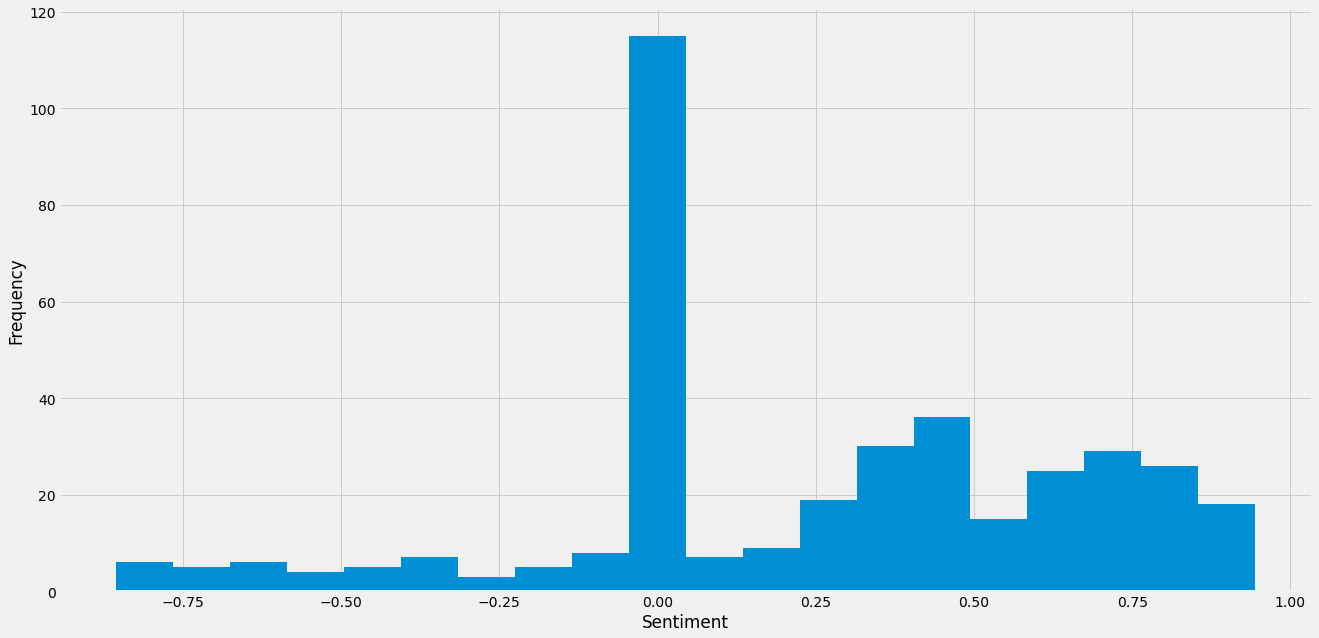

In [40]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(20,10))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, &#39;Average sentiment analysis of WSR tweets against time&#39;)

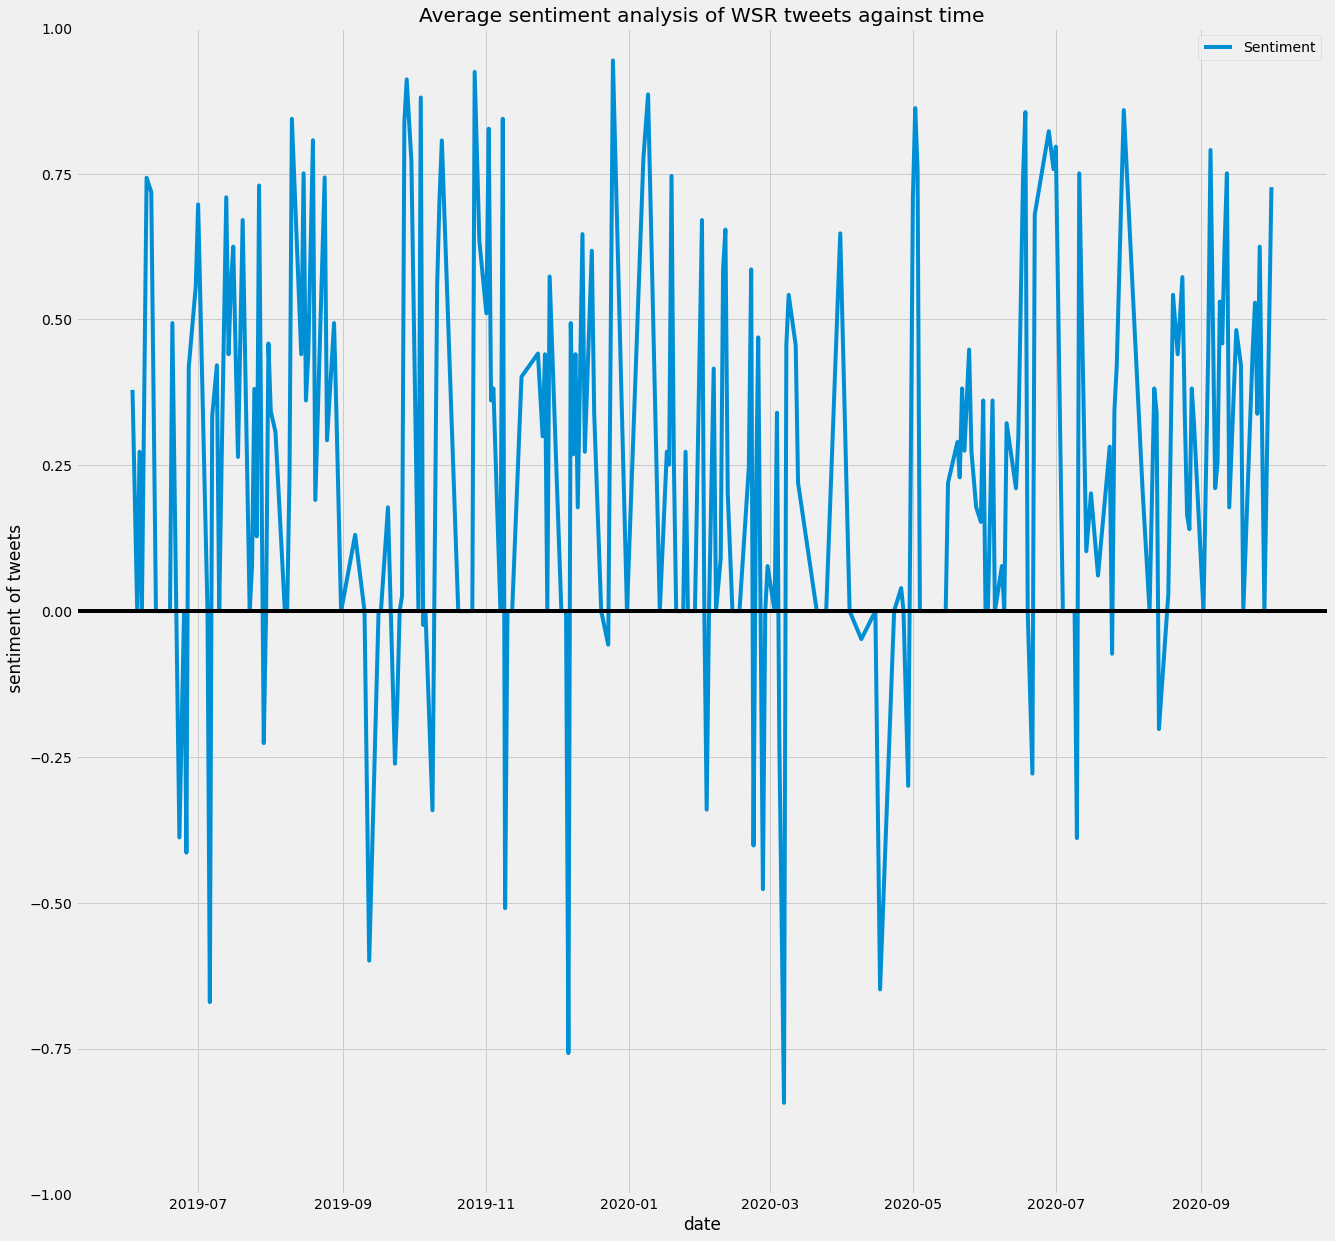

In [41]:
date_df = df.groupby(['Date']).mean().reset_index()
# date_df.head()
date_df.plot(kind='line', x="Date",y='Sentiment', figsize=(20,20), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.xlabel('date')
plt.ylabel(' sentiment of tweets')
plt.title('Average sentiment analysis of WSR tweets against time')

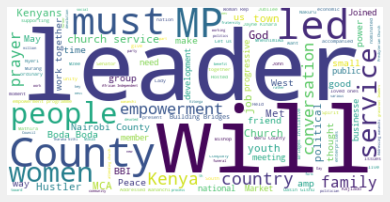

In [10]:
from wordcloud import WordCloud, STOPWORDS

text =  ' '.join(text for text in df.Tweets)

stopwords = set(STOPWORDS)

stopwords.update(['HTTPS', 'CO'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
t = df.Tweets
print(t)

0      The inclusion of COVID19 TREATMENT in the enha...
1      I pray that God grants their families, their l...
2      It is quite unfortunate that we lost fishermen...
3      I LOVE this country enough NEVER to be part of...
4      We commend TSC for including COVID 19 insuranc...
                             ...                        
385    Let us be mindful about the sorry situation of...
386    Leaders are duty-bound to work together, serve...
387    Led the empowerment of the 2,000-member Getemb...
388    It is for this reason that we are combining al...
389    Micro, small and medium-sized enterprises such...
Name: Tweets, Length: 390, dtype: object
